In [1]:
!pip install imageio numpy matplotlib
!pip install -e .

Obtaining file:///Users/alexliberzon/Documents/repos/openpiv_python_lite
  Attempting uninstall: openpiv-python-lite
    Found existing installation: openpiv-python-lite 0.1
    Uninstalling openpiv-python-lite-0.1:
      Successfully uninstalled openpiv-python-lite-0.1
  Running setup.py develop for openpiv-python-lite


In [2]:
from openpiv_python_lite import extended_search_area_piv as piv, get_coordinates, random_noise

In [3]:
import numpy as np

frame_a = np.zeros((32, 32))
frame_a = random_noise(frame_a)
frame_b = np.roll(np.roll(frame_a, 3, axis=1), 2, axis=0)
threshold = 0.1

def test_piv_32():
    """ test of the simplest PIV run 32 x 32 """
    u, v = piv(frame_a, frame_b, window_size=32)
    assert(np.abs(u-3) < threshold)
    assert(np.abs(v+2) < threshold)


def test_piv_16_32():
    """ test of the search area larger than the window """
    u, v = piv(frame_a, frame_b, window_size=16, search_area_size=32)
    assert(np.abs(u[0,0]-3) < threshold)
    assert(np.abs(v[0,0]+2) < threshold)

In [4]:
test_piv_32()

In [5]:
test_piv_16_32()

In [6]:
import imageio

def test_piv():
    """
    Simplest PIV run on the pair of images using default settings

    piv(im1,im2) will create a tmp.vec file with the vector filed in pix/dt (dt=1) from 
    two images, im1,im2 provided as full path filenames (TIF is preferable, whatever imageio can read)

    """


    # if im1 is None and im2 is None:
    im1 = ('./test/img/frame_a.tif')
    im2 = ('./test/img/frame_b.tif')

    frame_a = imageio.imread(im1)
    frame_b = imageio.imread(im2)
    
    frame_a[0:32, 512-32:] = 255

    print(frame_a[0,0])

    u, v = piv(frame_a,frame_b,
                                    window_size=32,overlap=16)
    x, y = get_coordinates(image_size = frame_a.shape, 
                           window_size=32, overlap=16)

    print(x[0], y[0], u[0], v[0])

    return x, y, u, v

In [7]:
x,y,u,v = test_piv()

0
[ 16.  32.  48.  64.  80.  96. 112. 128. 144. 160. 176. 192. 208. 224.
 240. 256. 272. 288. 304. 320. 336. 352. 368. 384. 400. 416. 432. 448.
 464. 480. 496.] [16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.] [ 0.95938837  0.98346617  1.04784319  1.05886846  1.20761461  1.26742268
  1.34640937  1.42034135  1.39168986  1.40575022  1.36677195  1.40086036
  1.3123752   1.24080693  1.30784351  1.1512783   1.16767496  1.01316333
  0.94193456  0.90701145  0.78900817  0.78919477  0.60782558  0.67340273
  0.59532751  0.50765493  0.4711314   0.47280763  0.3971003  -4.14878738
         nan] [ 7.98213358e-01  7.63942158e-01  7.38243280e-01  6.83750739e-01
  6.35287937e-01  5.40945934e-01  4.83806352e-01  4.30068140e-01
  2.87314701e-01  1.70037066e-01  6.34608020e-02 -3.12106990e-03
 -4.91035959e-02 -2.30341249e-01 -2.85272009e-01 -3.86972508e-01
 -4.49199516e-01 -5.06701844e-01 -5.31754472e-01 -5.82787049e-01
 -5.9107

/Users/alexliberzon/Documents/repos/openpiv_python_lite/openpiv_python_lite/pyprocess.py:265: RuntimeWarning: divide by zero encountered in log
  subp_peak_position = (peak1_i + ((log(cl) - log(cr)) / (2 * log(cl) - 4 * log(c) + 2 * log(cr))),
/Users/alexliberzon/Documents/repos/openpiv_python_lite/openpiv_python_lite/pyprocess.py:265: RuntimeWarning: invalid value encountered in double_scalars
  subp_peak_position = (peak1_i + ((log(cl) - log(cr)) / (2 * log(cl) - 4 * log(c) + 2 * log(cr))),
/Users/alexliberzon/Documents/repos/openpiv_python_lite/openpiv_python_lite/pyprocess.py:266: RuntimeWarning: divide by zero encountered in log
  peak1_j + ((log(cd) - log(cu)) / (2 * log(cd) - 4 * log(c) + 2 * log(cu))))
/Users/alexliberzon/Documents/repos/openpiv_python_lite/openpiv_python_lite/pyprocess.py:266: RuntimeWarning: invalid value encountered in double_scalars
  peak1_j + ((log(cd) - log(cu)) / (2 * log(cd) - 4 * log(c) + 2 * log(cu))))


In [8]:
import pylab

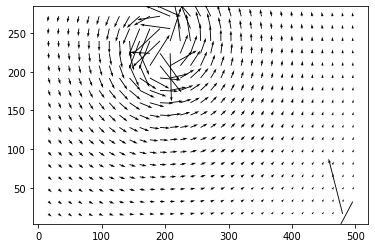

In [9]:
pylab.quiver(x,y,u,-v)